In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets
from sklearn.metrics import accuracy_score
import warnings
sns.set()

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

# The Iris Dataset

In [4]:
df = pd.read_csv('data/iris_unsupervised.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


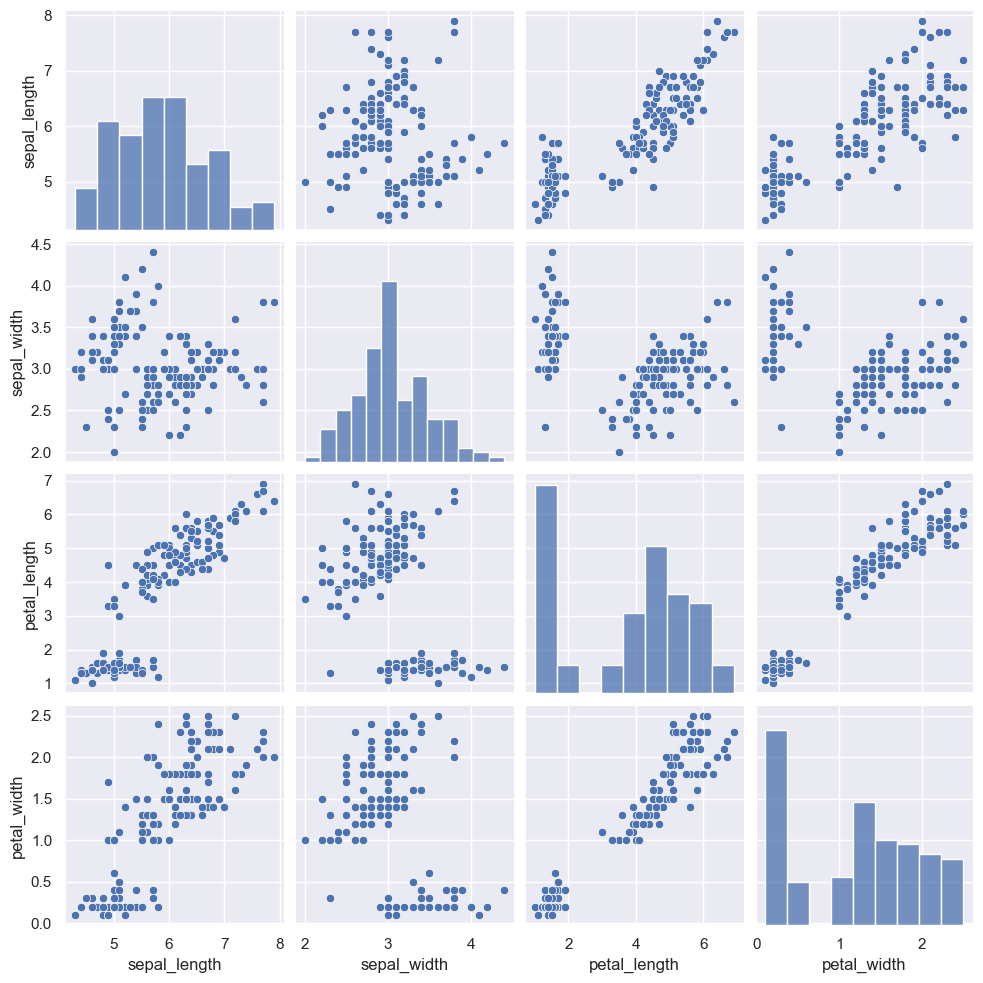

In [5]:
#  We can use pairplot to plot scatterplots of everything with everything else.  We put hisograms on the diagonal
sns.pairplot(df)

<Axes: xlabel='petal_width', ylabel='petal_length'>

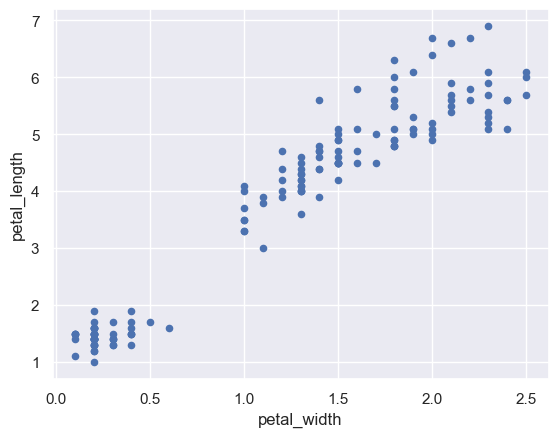

In [6]:
df.plot(kind='scatter', x='petal_width', y='petal_length')

## K-Means

In [13]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


df.head()
print(df.columns)

kmeans = KMeans()
KMeans??


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init='warn',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Source:        
class KMeans(_BaseKMeans):
    """K-Means clustering.

    Read more in the :ref:`User Guide <k_means>`.

    Parameters
    ----------

    n_clusters : int, default=8
        The number of clusters to form as well as the number of
        centroids to generate.

    init : {'k-means++', 'random'}, callable or array-like of shape \
            (n_clusters, n_features), default='k-means++'
        Method for initialization:

        'k-means++' : selects initial cluster centroids using sampling based on
        an empirical probability distribution of the points' contribution to the
        overall inertia. This technique speeds up convergence. The algorithm
        implemented is "greedy k-means++". It differs from the vanilla k-means++
        by making several trials

In [24]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',]

X = df[features]

kmeans = KMeans(n_clusters=3)


kmeans.fit(X) # fit is compute

df['cluster'] = kmeans.predict(X)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,class,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


<Axes: xlabel='petal_width', ylabel='petal_length'>

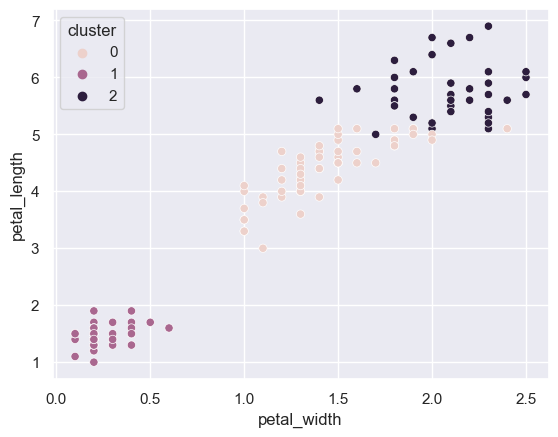

In [25]:
# df.plot(kind='scatter', x='petal_width', y='petal_length', color='cluster')
sns.scatterplot(df, x='petal_width', y='petal_length', hue='cluster')

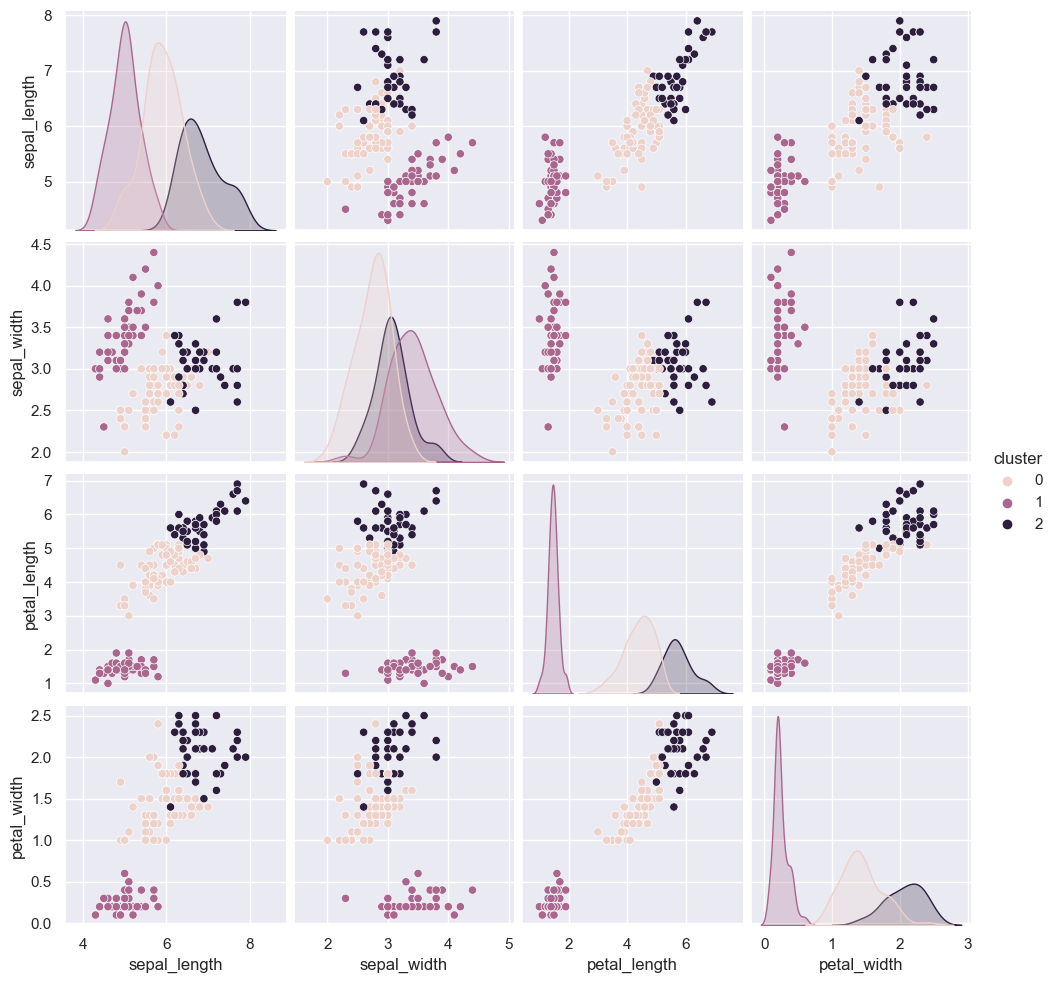

In [26]:
sns.pairplot(df, hue='cluster')

##### STOP HERE IN ACTUAL CLASS, HOWEVER... 
# If you want more... 
##### BELOW IS ADDITIONAL STUFF TO VALIDATE YOUR CLUSTERS WHEN YOU HAVE LABELS. 

# Now we have clusters, lets see if they correspond to any of the know groups/classes/labels. 

<Axes: title={'center': 'Y-Predicted'}, xlabel='petal_width', ylabel='Count'>

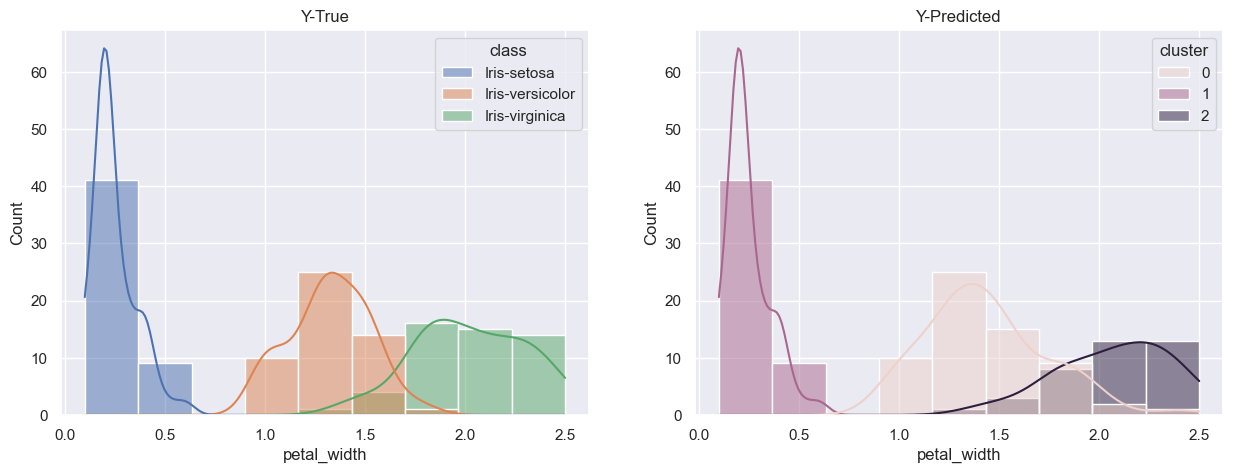

In [27]:
import matplotlib.pyplot as plt

df = pd.read_csv('data/iris.csv')
df['cluster'] = kmeans.predict(df[features])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title('Y-True')
sns.histplot(df, x='petal_width', hue='class', kde=True, ax=axes[0])

axes[1].set_title('Y-Predicted')
sns.histplot(df, x='petal_width', hue='cluster', kde=True, ax=axes[1])

In [ ]:
cluster_to_class_map = {
    1: 'Iris-setosa',
    0: 'Iris-versicolor',
    2: 'Iris-virginica'
}

df['y_pred_label'] = df.cluster.map(cluster_to_class_map)
df.head()

In [ ]:
y_true = df['class']
y_pred = df['y_pred_label']

accuracy_score(y_true=y_true, y_pred=y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

y_true = df['class']
y_pred = df['y_pred_label']

print(classification_report(y_true, y_pred))

In [ ]:
print(df['class'].value_counts())
print(df.y_pred_label.value_counts())

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true, y_pred)